In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [112]:
# Lecture de la base de données

# Construire le chemin d'accès au dataset
script_dir = "C:/Users/wwway/Downloads/prediction-of-TGV-delays-main/prediction-of-TGV-delays-main"
relative_path = 'dataset/regularite-mensuelle-tgv-aqst.csv'
csv_path = os.path.join(script_dir, relative_path)

# Chargez le fichier CSV
data = pd.read_csv(csv_path, delimiter=";")
gares_info = pd.read_csv("C:/Users/wwway/Downloads/liste-des-gares.csv", delimiter=";")
print(data.head(6))

      date   service         gare_depart         gare_arrivee  duree_moyenne  \
0  2018-01  National    BORDEAUX ST JEAN   PARIS MONTPARNASSE            141   
1  2018-01  National   LA ROCHELLE VILLE   PARIS MONTPARNASSE            165   
2  2018-01  National  PARIS MONTPARNASSE              QUIMPER            220   
3  2018-01  National  PARIS MONTPARNASSE              ST MALO            156   
4  2018-01  National  PARIS MONTPARNASSE  ST PIERRE DES CORPS             61   
5  2018-01  National             QUIMPER   PARIS MONTPARNASSE            223   

   nb_train_prevu  nb_annulation  commentaire_annulation  \
0             870              5                     NaN   
1             222              0                     NaN   
2             248              1                     NaN   
3             102              0                     NaN   
4             391              2                     NaN   
5             256              1                     NaN   

   nb_train_depart

In [131]:
gares_info

,code_uic,libelle,fret,voyageurs,code_ligne,rg_troncon,pk,commune,departemen,idreseau,idgaia,x_l93,y_l93,x_wgs84,y_wgs84,c_geo,geo_point_2d,geo_shape
0,87381194,Chars,O,O,330000,2,047+605,CHARS,VAL-D'OISE,3626,d9e6c420-6667-11e3-89ff-01f464e0362d,6.224612e+05,6.896394e+06,1.936959,49.162612,"49.162611630469804,1.9369591936481116","49.16261162951619,1.9369591936481103","{""coordinates"": [1.93695919364811, 49.16261162..."
1,87696450,Imphy,O,O,760000,1,015+061,IMPHY,NIEVRE,4486,e020ab6c-19bf-11e5-82ff-01fc64e0362d,7.197364e+05,6.648045e+06,3.259411,46.932312,"46.9323116784127,3.2594111257846357","46.932311677457676,3.259411125784635","{""coordinates"": [3.259411125784635, 46.9323116..."
2,87276295,Verberie,O,N,232000,1,073+910,VERBERIE,OISE,7144,e19f26f2-19bf-11e5-a6ff-01fc64e0362d,6.815147e+05,6.913405e+06,2.745805,49.319961,"49.3199613885081,2.7458049675076976","49.319961387556035,2.7458049675076968","{""coordinates"": [2.745804967507697, 49.3199613..."
3,87682443,Vulaines-sur-Seine-Samoreau,N,O,746000,1,074+298,VULAINES-SUR-SEINE,SEINE-ET-MARNE,7338,d9ca5fb6-6667-11e3-89ff-01f464e0362d,6.817338e+05,6.814505e+06,2.753071,48.430569,"48.43056863999238,2.753071315575744","48.43056863903182,2.753071315575743","{""coordinates"": [2.753071315575743, 48.4305686..."
4,87381160,Montgeroult-Courcelles,N,O,330000,2,036+485,MONTGEROULT,VAL-D'OISE,5615,2924060e-dfbc-11e3-a2ff-01a464e0362d,6.272197e+05,6.887195e+06,2.003781,49.080467,"49.0804673352717,2.003781236555363","49.08046733431728,2.0037812365553616","{""coordinates"": [2.003781236555362, 49.0804673..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,87144055,Charmes,O,O,42000,1,025+346,CHARMES,VOSGES,3624,d99b0b68-6667-11e3-89ff-01f464e0362d,9.444109e+05,6.813820e+06,6.301733,48.378685,"48.378685295827026,6.301733373092041","48.378685294865996,6.301733373092041","{""coordinates"": [6.301733373092041, 48.3786852..."
3815,87342261,Ham-en-Artois,N,O,301000,1,246+028,HAM-EN-ARTOIS,PAS-DE-CALAIS,4404,2945bed4-dfbc-11e3-a2ff-01a464e0362d,6.621284e+05,7.054846e+06,2.466076,50.589560,"50.589559825962844,2.466075551732472","50.589559825023926,2.466075551732471","{""coordinates"": [2.466075551732471, 50.5895598..."
3816,87214270,Goxwiller,N,O,111000,1,021+351,GOXWILLER,BAS-RHIN,4336,d9700bba-6667-11e3-89ff-01f464e0362d,1.031120e+06,6.824114e+06,7.478786,48.432772,"48.43277220196985,7.478786397235771","48.4327722010093,7.478786397235773","{""coordinates"": [7.478786397235773, 48.4327722..."
3817,87574251,La Chaussée-St-Victor,N,O,570000,2,175+710,LA CHAUSSÉE-SAINT-VICTOR,LOIR-ET-CHER,4630,e029f642-19bf-11e5-82ff-01fc64e0362d,5.763866e+05,6.724932e+06,1.354420,47.613178,"47.613178498938076,1.3544202800267977","47.61317849797024,1.3544202800267964","{""coordinates"": [1.354420280026796, 47.6131784..."


In [5]:
# Transformer les datetime en période
df = data
df["date"]= pd.to_datetime(df["date"])
df['month_year'] = df['date'].dt.to_period('M')
df

NameError: name 'data' is not defined

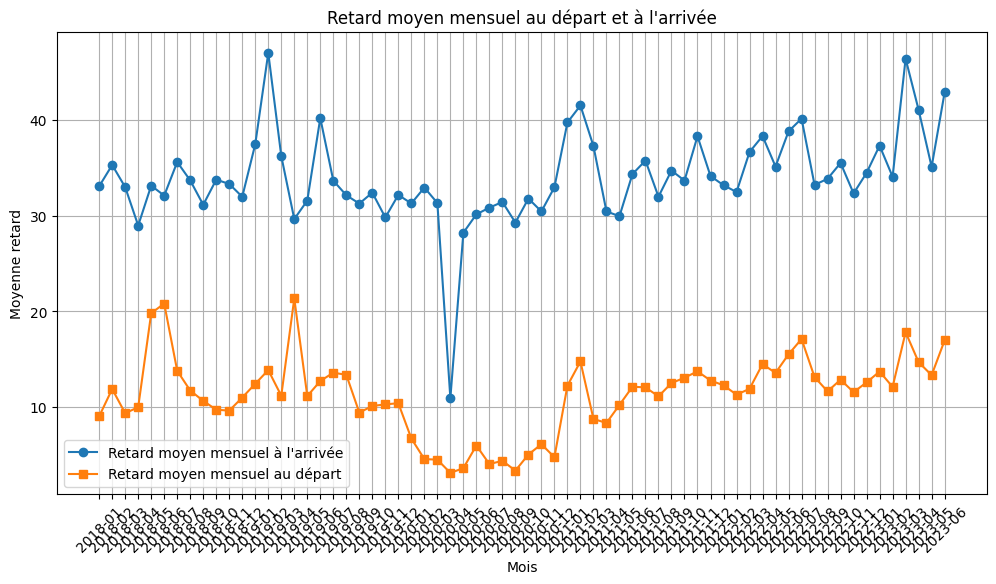

In [12]:
df= data.copy()

# Convert the "date" column to a datetime object with format 'YYYY-MM'
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')


# Group the data by month, calculate the average arrival and departure delays for each month
monthly_mean_arrival_delay = df.groupby(df['date'].dt.to_period('M'))['retard_moyen_arrivee'].mean()
monthly_mean_departure_delay = df.groupby(df['date'].dt.to_period('M'))['retard_moyen_depart'].mean()

# Create an integer range for the x-axis based on the number of data points
x = range(len(monthly_mean_arrival_delay))

# Plot the data on the same plot
plt.figure(figsize=(12, 6))
plt.plot(x, monthly_mean_arrival_delay, label="Retard moyen mensuel à l'arrivée", marker='o')
plt.plot(x, monthly_mean_departure_delay, label='Retard moyen mensuel au départ', marker='s')
plt.title("Retard moyen mensuel au départ et à l'arrivée")
plt.xlabel('Mois')
plt.ylabel('Moyenne retard')
plt.legend()

# Set the x-axis ticks and labels
plt.xticks(x, [d.strftime('%Y-%m') for d in monthly_mean_arrival_delay.index], rotation=45)

plt.grid(True)
plt.show()

In [42]:
df[df['nb_train_depart_retard'] > 0].groupby('gare_depart')['nb_train_depart_retard'].

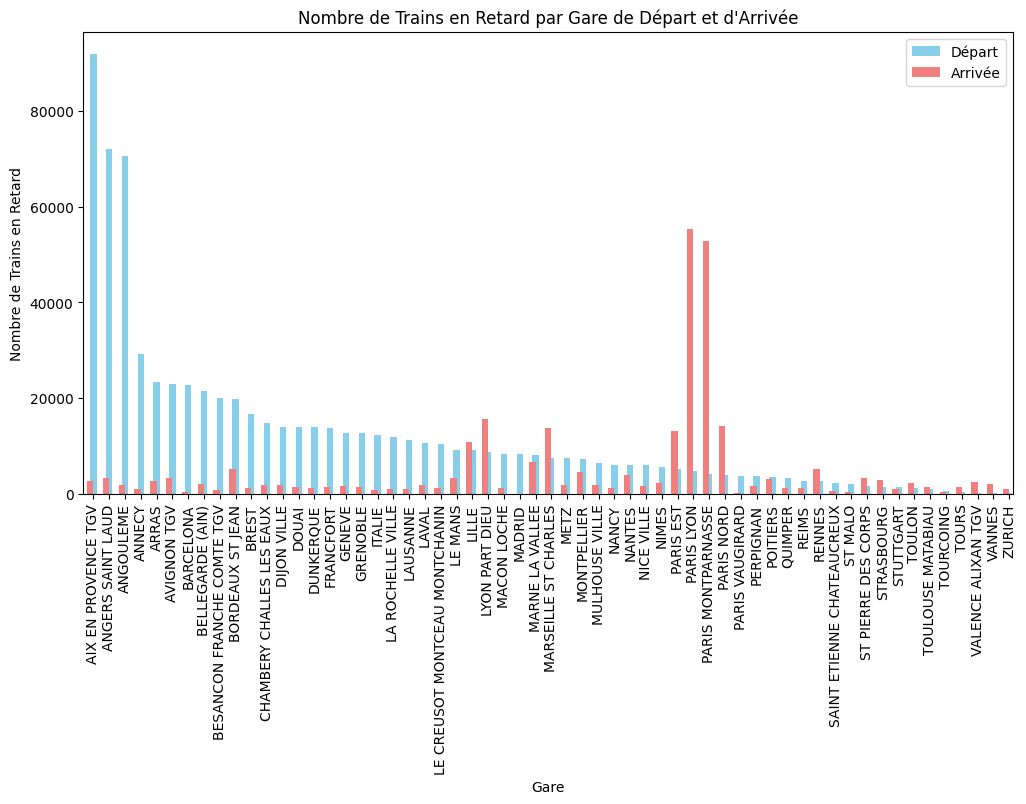

In [47]:
# Grouper par "gare_depart" et compter le nombre de trains en retard au départ
nombre_trains_retard_depart = df[df['nb_train_depart_retard'] > 0].groupby('gare_depart')['nb_train_depart_retard'].sum()

# Grouper par "gare_arrivee" et compter le nombre de trains en retard à l'arrivée
nombre_trains_retard_arrivee = df[df['nb_train_retard_arrivee'] > 0].groupby('gare_arrivee')['nb_train_retard_arrivee'].sum()

# Triez les gares par le nombre de trains en retard au départ, en ordre décroissant
nombre_trains_retard_depart = nombre_trains_retard_depart.sort_values(ascending=False)

# Créez un graphique en barres
plt.figure(figsize=(12, 6))

# Créez un petit décalage entre les deux barres
width = 0.4

nombre_trains_retard_depart.plot(kind='bar', color='skyblue', label='Départ', width=width)
nombre_trains_retard_arrivee.plot(kind='bar', color='lightcoral', label='Arrivée', width=width, position=1)

plt.title('Nombre de Trains en Retard par Gare de Départ et d\'Arrivée')
plt.xlabel('Gare')
plt.ylabel('Nombre de Trains en Retard')

# Rotation des étiquettes de l'axe des x de 90 degrés
plt.xticks(rotation=90)

# Ajoutez une légende pour distinguer les données de départ et d'arrivée
plt.legend()

plt.show()

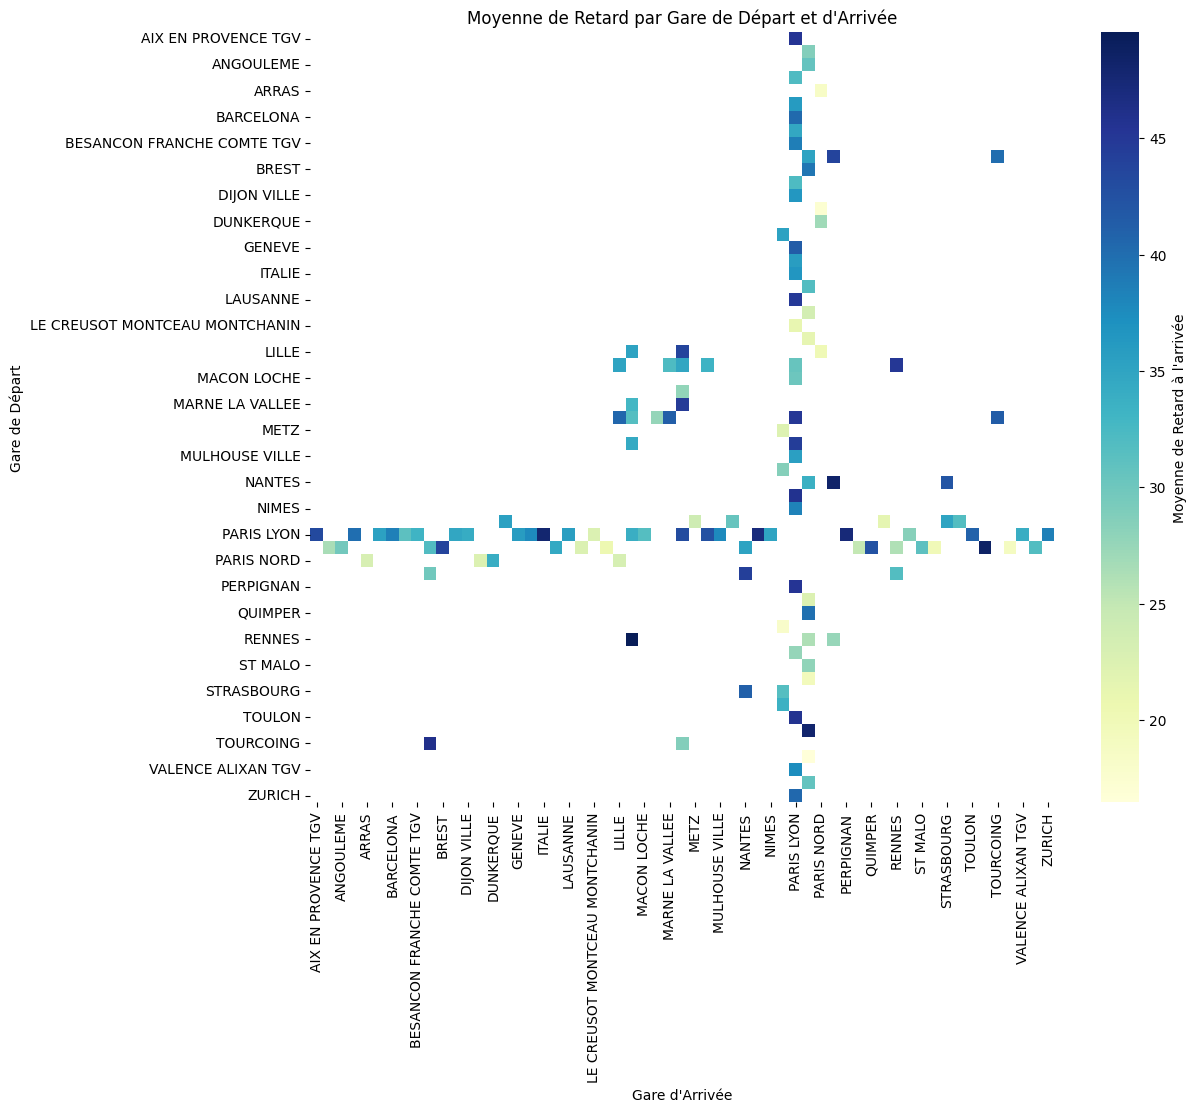

In [50]:
# Pivot the DataFrame to create a matrix of average delays
pivot_df = df.pivot_table(index='gare_depart', columns='gare_arrivee', values='retard_moyen_arrivee', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_df, cmap='YlGnBu', fmt=".1f", cbar_kws={'label': "Moyenne de Retard à l'arrivée"})
plt.title('Moyenne de Retard par Gare de Départ et d\'Arrivée')
plt.xlabel('Gare d\'Arrivée')
plt.ylabel('Gare de Départ')

plt.show()

C:\Users\wwway\AppData\Local\Temp\ipykernel_13084\1546660234.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(gares, rotation=90)


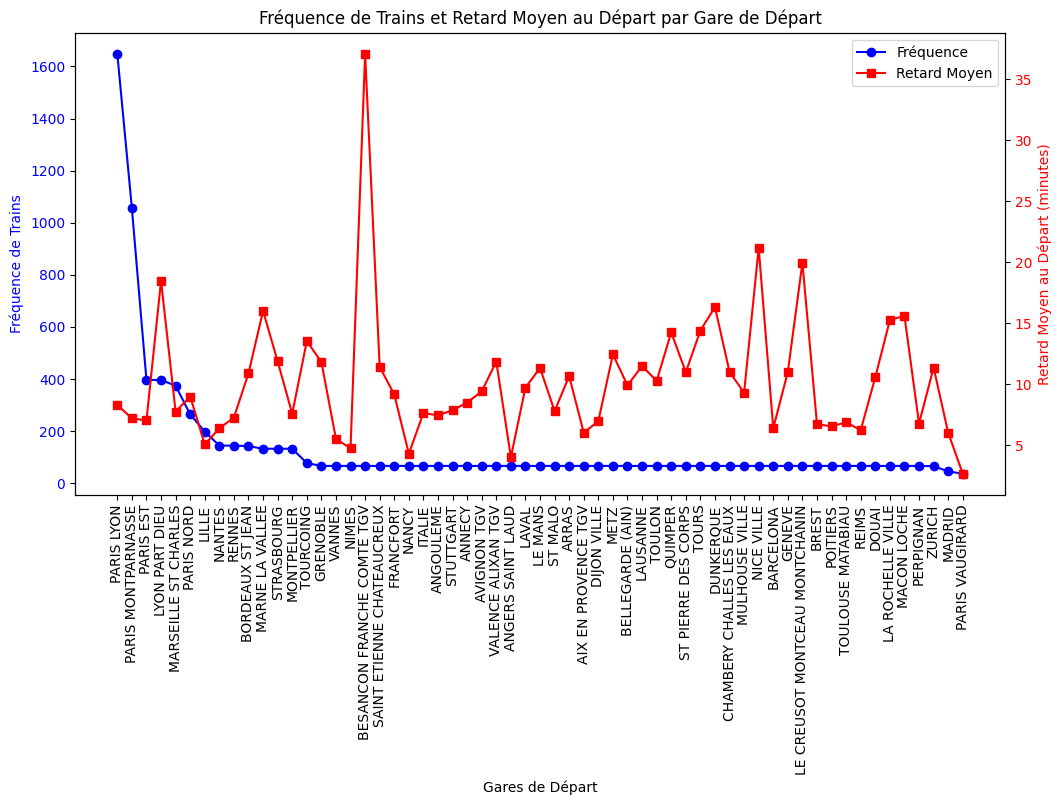

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle "df"

# Comptez le nombre d'instances par gare de départ
frequence_gare_depart = df['gare_depart'].value_counts()

# Groupez par "gare_depart" et calculez la moyenne du retard au départ
retard_moyen_depart = df.groupby('gare_depart')['retard_moyen_depart'].mean()

# Créez une liste d'abscisses (gares de départ)
gares = frequence_gare_depart.index

# Créez un graphique à deux axes Y distincts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracez la première ligne pour la fréquence sur l'axe des Y1
ax1.plot(gares, frequence_gare_depart, color='b', marker='o', label='Fréquence')
ax1.set_xlabel('Gares de Départ')
ax1.set_ylabel('Fréquence de Trains', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Créez un deuxième axe Y pour le retard moyen
ax2 = ax1.twinx()
ax2.plot(gares, retard_moyen_depart, color='r', marker='s', label='Retard Moyen')
ax2.set_ylabel('Retard Moyen au Départ (minutes)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Fréquence de Trains et Retard Moyen au Départ par Gare de Départ')

# Ajoutez une légende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Ajoutez cette ligne pour faire pivoter les noms des gares de 90 degrés
ax1.set_xticklabels(gares, rotation=90)

plt.show()


C:\Users\wwway\AppData\Local\Temp\ipykernel_13084\1795640459.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(gares_arrivee, rotation=90)


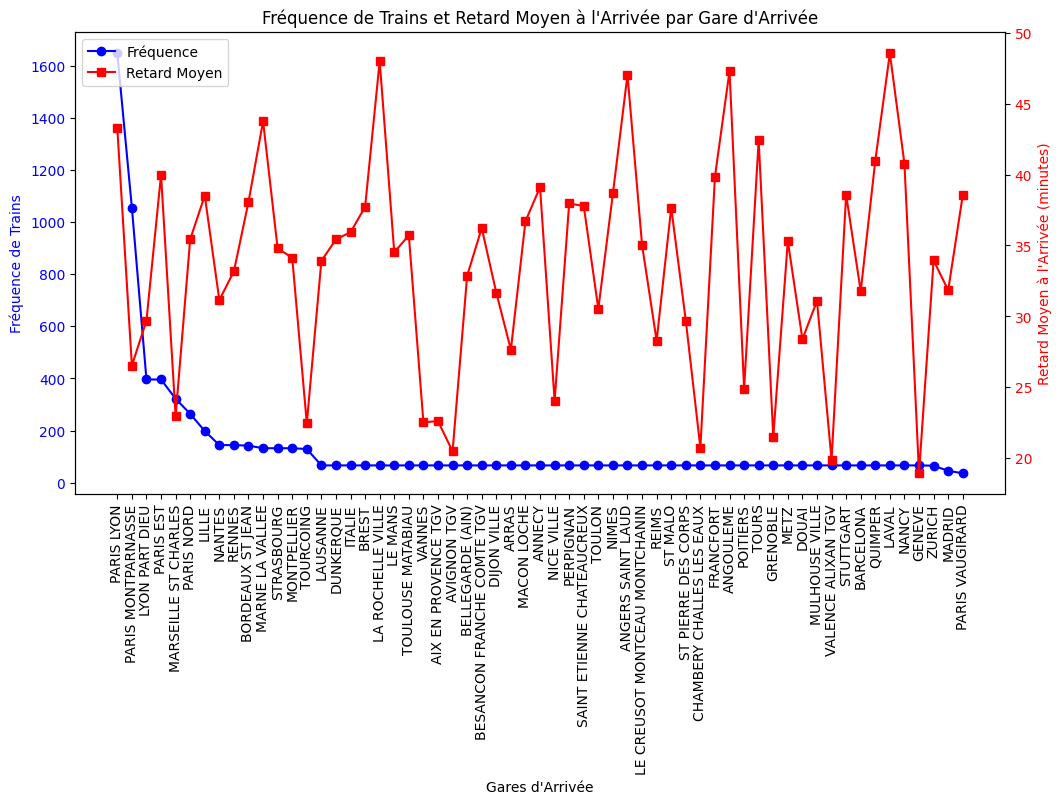

In [61]:

# Comptez le nombre d'instances par gare d'arrivée
frequence_gare_arrivee = df['gare_arrivee'].value_counts()

# Groupez par "gare_arrivee" et calculez la moyenne du retard à l'arrivée
retard_moyen_arrivee = df.groupby('gare_arrivee')['retard_moyen_arrivee'].mean()

# Créez une liste d'abscisses (gares d'arrivée)
gares_arrivee = frequence_gare_arrivee.index

# Créez un graphique à deux axes Y distincts
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracez la première ligne pour la fréquence sur l'axe des Y1
ax1.plot(gares_arrivee, frequence_gare_arrivee, color='b', marker='o', label='Fréquence')
ax1.set_xlabel('Gares d\'Arrivée')
ax1.set_ylabel('Fréquence de Trains', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Créez un deuxième axe Y pour le retard moyen à l'arrivée
ax2 = ax1.twinx()
ax2.plot(gares_arrivee, retard_moyen_arrivee, color='r', marker='s', label='Retard Moyen')
ax2.set_ylabel('Retard Moyen à l\'Arrivée (minutes)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Fréquence de Trains et Retard Moyen à l\'Arrivée par Gare d\'Arrivée')

# Ajoutez une légende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Ajoutez cette ligne pour faire pivoter les noms des gares d'arrivée de 90 degrés
ax1.set_xticklabels(gares_arrivee, rotation=90)

plt.show()

In [98]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = data['retard_moyen_arrivee'].groupby(data['gare_depart']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('mean',ascending=False)
global_stats

,min,max,count,mean
gare_depart,,,,
TOULOUSE MATABIAU,20.683333,92.334783,66.0,48.006583
NICE VILLE,0.000000,75.144203,66.0,45.802248
TOULON,0.000000,71.945333,66.0,45.550346
AIX EN PROVENCE TGV,23.983333,89.785714,66.0,45.390239
PERPIGNAN,0.000000,80.692949,66.0,45.310804
LAUSANNE,0.000000,112.687500,66.0,44.899500
TOURCOING,0.000000,299.600000,77.0,43.070961
GENEVE,0.000000,88.898810,66.0,41.519903
ZURICH,0.000000,147.716667,65.0,40.407253


C:\Users\wwway\AppData\Local\Temp\ipykernel_13084\2981846498.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['Catégorie de Retard'] = df_filtre['retard_moyen_arrivee'].apply(categoriser_retard)
C:\Users\wwway\AppData\Local\Temp\ipykernel_13084\2981846498.py:29: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=df_filtre, y='gare_depart', hue='Catégorie de Retard', order=top_10_gares_depart, palette=palette)


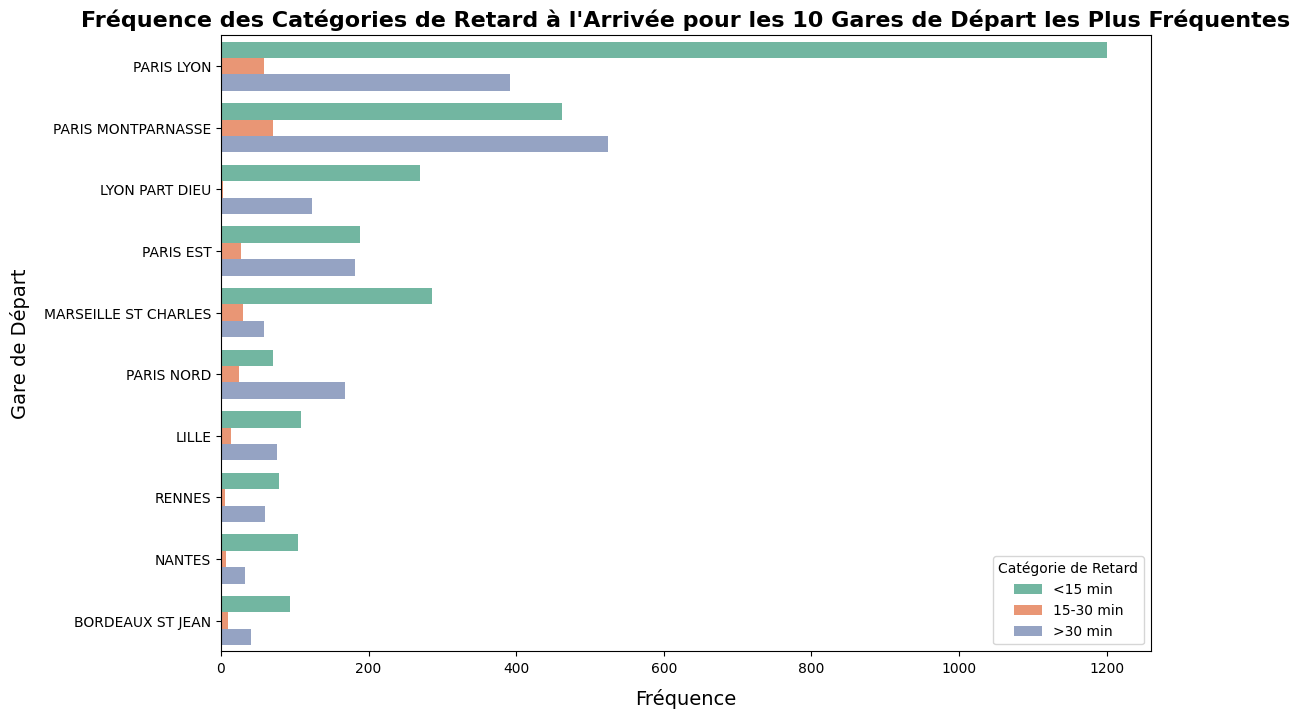

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remplacez 'votre_dataframe' par le nom de votre DataFrame
votre_dataframe = data

# Obtenir les 10 gares de départ les plus fréquentes
top_10_gares_depart = votre_dataframe['gare_depart'].value_counts().head(10).index

# Filtrer le DataFrame pour les 10 gares de départ les plus fréquentes
df_filtre = votre_dataframe[votre_dataframe['gare_depart'].isin(top_10_gares_depart)]

# Définir une fonction pour catégoriser les retards
def categoriser_retard(retard):
    if retard < 15:
        return '<15 min'
    elif retard < 30:
        return '15-30 min'
    else:
        return '>30 min'

# Appliquer la fonction de catégorisation pour créer une nouvelle colonne 'Catégorie de Retard'
df_filtre['Catégorie de Retard'] = df_filtre['retard_moyen_arrivee'].apply(categoriser_retard)

# Créer un graphique en barres horizontales pour visualiser la fréquence des catégories de retard
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2")
sns.countplot(data=df_filtre, y='gare_depart', hue='Catégorie de Retard', order=top_10_gares_depart, palette=palette)
plt.xlabel('Fréquence', fontsize=14, labelpad=10)
plt.ylabel('Gare de Départ', fontsize=14, labelpad=10)
plt.title('Fréquence des Catégories de Retard à l\'Arrivée pour les 10 Gares de Départ les Plus Fréquentes', fontsize=16, fontweight='bold')
plt.legend(title='Catégorie de Retard', labels=['<15 min', '15-30 min', '>30 min'])
plt.show()


C:\Users\wwway\AppData\Local\Temp\ipykernel_13084\4078792241.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe['Delay_Category'] = filtered_dataframe['retard_moyen_arrivee'].apply(categorize_delay)
C:\Users\wwway\AppData\Local\Temp\ipykernel_13084\4078792241.py:29: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=filtered_dataframe, x='gare_depart', hue='Delay_Category', order=top_10_departure_stations, palette=palette)


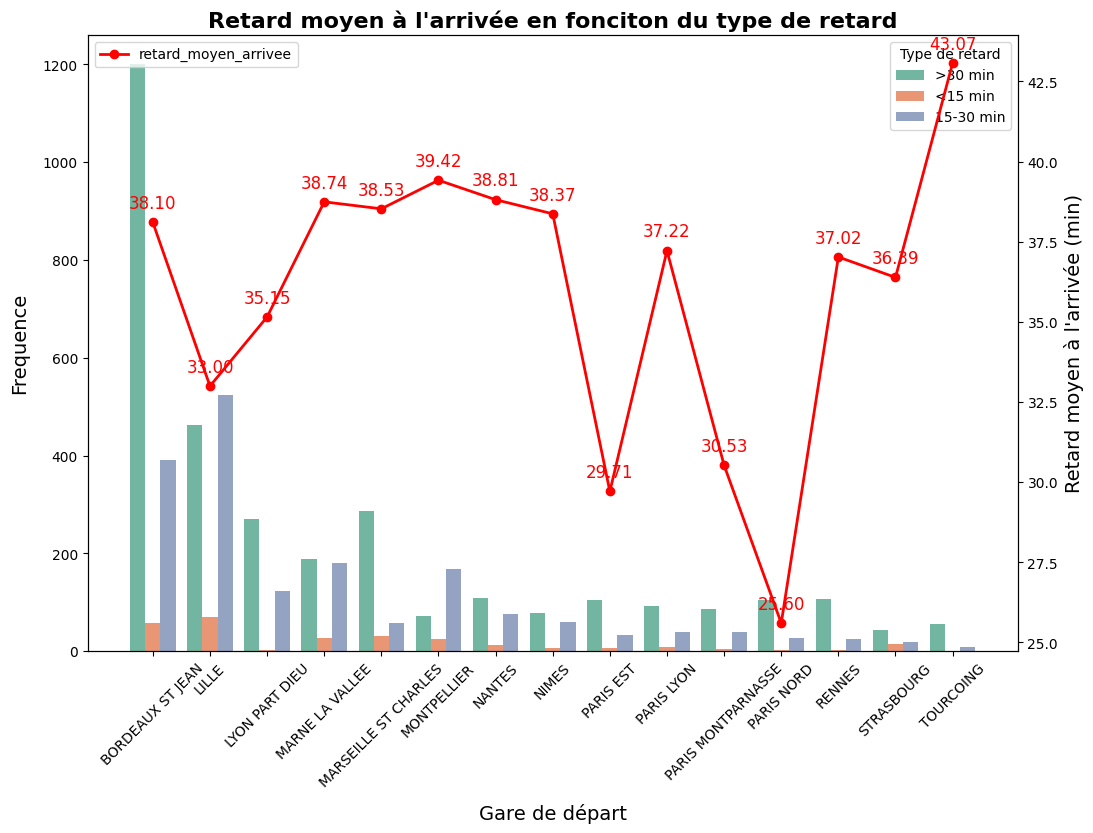

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_dataframe' with the actual name of your DataFrame
your_dataframe = data

# Get the top 10 most frequent departure stations
top_10_departure_stations = your_dataframe['gare_depart'].value_counts().head(15).index

# Filter the DataFrame for the top 10 departure stations
filtered_dataframe = your_dataframe[your_dataframe['gare_depart'].isin(top_10_departure_stations)]

# Define a function to categorize delays
def categorize_delay(delay):
    if delay < 15:
        return '<15 min'
    elif delay < 30:
        return '15-30 min'
    else:
        return '>30 min'

# Apply the categorization function to create a new column 'Delay_Category'
filtered_dataframe['Delay_Category'] = filtered_dataframe['retard_moyen_arrivee'].apply(categorize_delay)

# Create a countplot to visualize the frequency of delay categories for the top 10 departure stations
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set2")
sns.countplot(data=filtered_dataframe, x='gare_depart', hue='Delay_Category', order=top_10_departure_stations, palette=palette)
plt.xlabel('Gare de départ', fontsize=14, labelpad=10)
plt.ylabel('Frequence', fontsize=14, labelpad=10)
plt.title("Retard moyen à l'arrivée en fonciton du type de retard", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Type de retard')

# Calculate the average arrival delay for each station
average_arrival_delay = filtered_dataframe.groupby('gare_depart')['retard_moyen_arrivee'].mean()

# Create a line plot for the average arrival delay
plt.twinx()
average_arrival_delay.plot(legend=True, color='red', marker='o', linewidth=2)
plt.ylabel("Retard moyen à l'arrivée (min)", fontsize=14)

# Annotate the data points with their values
for i, val in enumerate(average_arrival_delay):
    plt.annotate(f'{val:.2f}', (i, val), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='red')

plt.show()


In [130]:
# Filtrez les données pour Paris Montparnasse (départ et arrivée)
paris_montparnasse_data_depart = data[data['gare_arrivee'] == 'PARIS MONTPARNASSE']
paris_montparnasse_data_arrivee = data[data['gare_depart'] == 'PARIS MONTPARNASSE']

# Triez les données pour les deux cas
paris_montparnasse_data_depart = paris_montparnasse_data_depart.sort_values(by='gare_depart')
paris_montparnasse_data_arrivee = paris_montparnasse_data_arrivee.sort_values(by='gare_arrivee')

# Créez un graphique
plt.figure(figsize=(12, 6))

# Affichez les données de départ en bleu
plt.bar(paris_montparnasse_data_depart['gare_depart'], paris_montparnasse_data_depart['nb_train_depart_retard'], color='#C4C362', label='Départ')

# Affichez les données d'arrivée en vert
plt.bar(paris_montparnasse_data_arrivee['gare_arrivee'], paris_montparnasse_data_arrivee['nb_train_retard_arrivee'], color='#8FD1F2', label='Arrivée')

plt.xlabel('Gares')
plt.ylabel('Nombre de trains en retard')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Nombre de trains en retard depuis PARIS MONTPARNASSE par gare de départ/arrivée')
plt.legend()  # Ajoutez une légende pour différencier les données de départ et d'arrivée

plt.show()

KeyError: 'gare_arrivee'

In [126]:
from geopy.distance import great_circle

def calculer_distance(coord1, coord2):
    return great_circle(coord1, coord2).kilometers

In [129]:
# Joignez les informations de gare pour la gare de départ
df_merged = data.merge(gares_info[['libelle', 'x_wgs84', 'y_wgs84']], left_on='gare_depart', right_on='libelle', how='left')
df_merged.rename(columns={'x_WGS84': 'Depart_Latitude', 'y_WGS84': 'Depart_Longitude'}, inplace=True)

# Joignez les informations de gare pour la gare d'arrivée
df_merged = df_merged.merge(gares_info[['libelle', 'x_wgs84', 'y_wgs84']], left_on='gare_arrivee', right_on='libelle', how='left')
df_merged.rename(columns={'w_wgs84': 'Arrivee_Latitude', 'y_wgs84': 'Arrivee_Longitude'}, inplace=True)
#calculer distance
df_merged['Distance_km'] = votre_dataframe.apply(
    lambda row: calculer_distance((row['Depart_Latitude'], row['Depart_Longitude']), (row['Arrivee_Latitude'], row['Arrivee_Longitude'])),
    axis=1
)

df_merged

KeyError: 'Depart_Latitude'

In [ ]:
n = data.shape[0]
data.isnull().sum()*100/n

In [ ]:
#Info sur les types des données du dataset (float, int, object)
print(data.dtypes)

In [5]:
#Info sur chaque colonne du dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

In [ ]:
#On convertit la colonne 'date' du DataFrame en un format de date spécifique (année-mois)
#en utilisant la fonction pd.to_datetime, et on crée une nouvelle colonne "année" pour faciliter le split
data['date'] = pd.to_datetime(data['date'])
data['annee'] = data['date'].dt.year
data

In [70]:
data[data["prct_cause_infra"]==100].prct_cause_infra.count()
data[data["prct_cause_infra"]>50].prct_cause_infra.count()



305

In [65]:
list(data.columns)

['Gare de Départ', 'Fréquence', 'Retard Moyen Départ']

In [85]:
df=data[[
 'nb_train_depart_retard',
 "nb_train_prevu",
 'nb_annulation',
 "nb_train_retard_sup_15",
 "retard_moyen_trains_retard_sup15",
 "nb_train_retard_sup_30", 
 "nb_train_retard_sup_60",
 "duree_moyenne",
 'retard_moyen_depart',
 'retard_moyen_tous_trains_depart',
 'nb_train_retard_arrivee',
 'retard_moyen_arrivee',
 'retard_moyen_tous_trains_arrivee',
]]

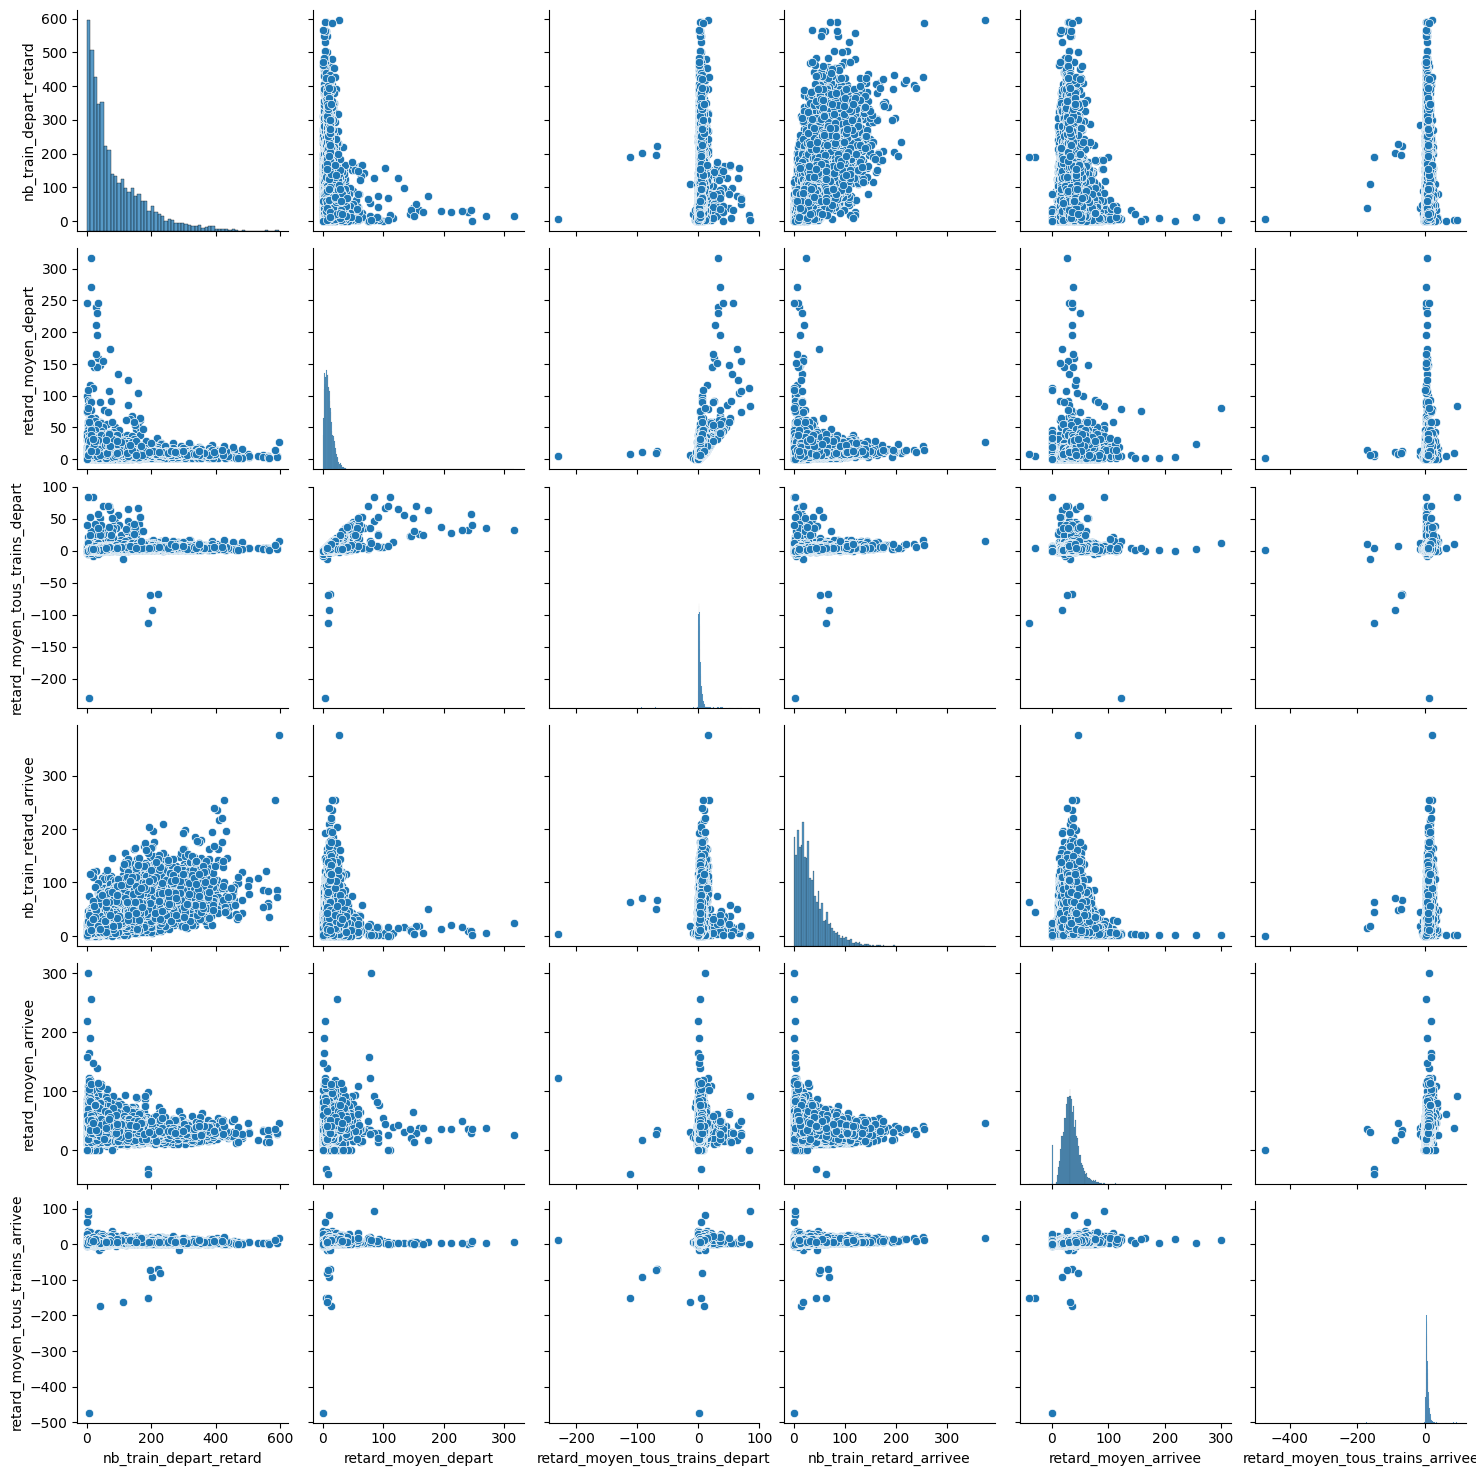

In [72]:
sns.pairplot(data[[
 'nb_train_depart_retard',
 'retard_moyen_depart',
 'retard_moyen_tous_trains_depart',
 'nb_train_retard_arrivee',
 'retard_moyen_arrivee',
 'retard_moyen_tous_trains_arrivee',
]])

<Axes: xlabel='retard_moyen_arrivee', ylabel='retard_moyen_tous_trains_arrivee'>

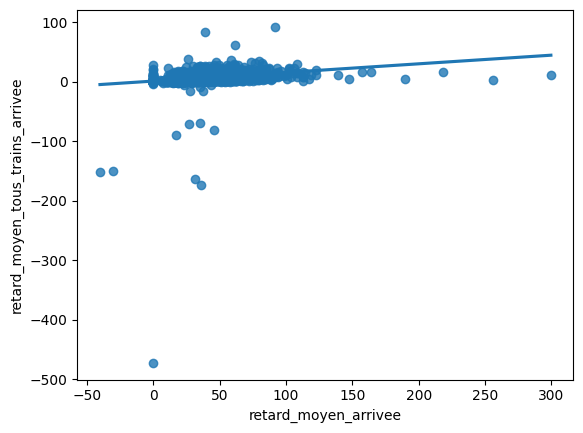

In [73]:
sns.regplot(data=data, x="retard_moyen_arrivee", y="retard_moyen_tous_trains_arrivee", ci=None)

# Matrice de corrélation

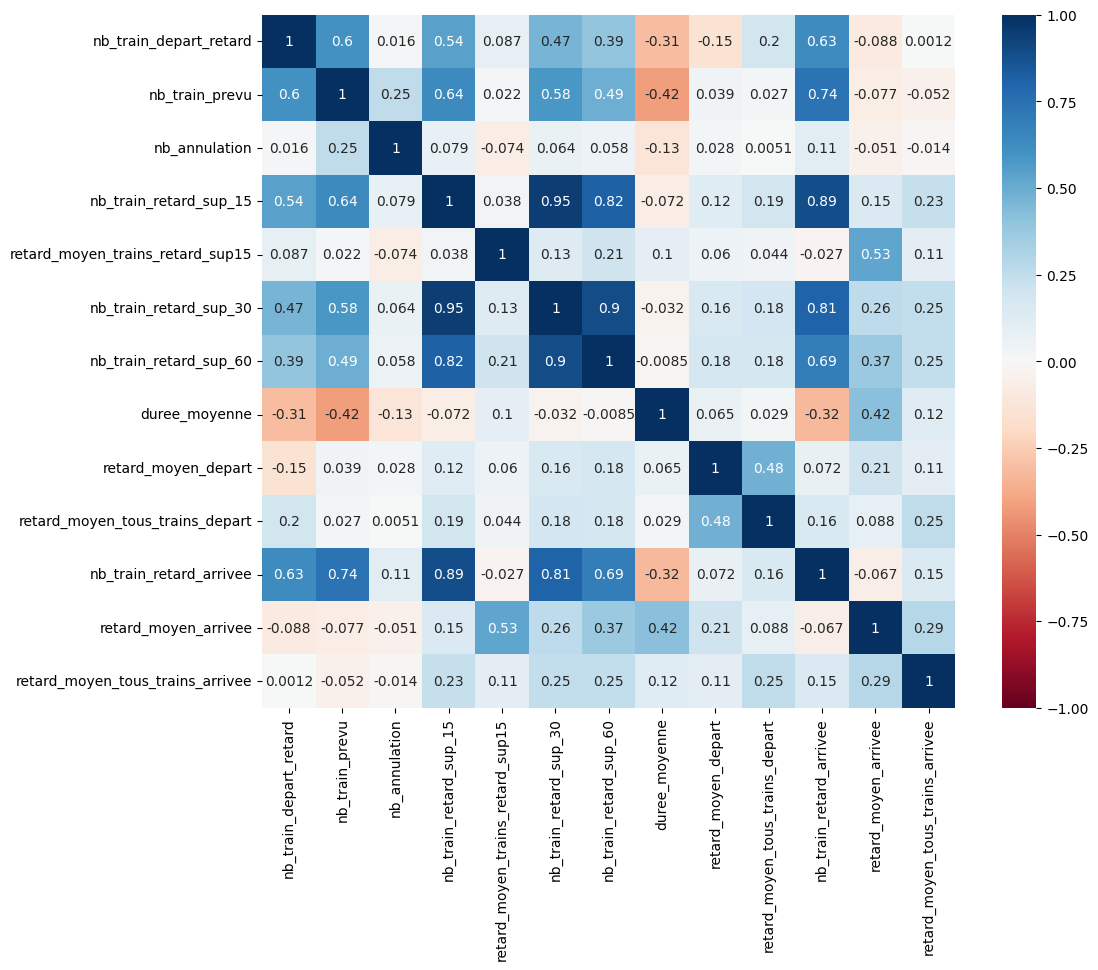

In [91]:
plt.figure(figsize=(12, 9))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
colormap = plt.cm.RdBu
heatmap = sns.heatmap(df.corr(), vmin=-1,square=True, cmap=colormap, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

In [133]:
#from sklearn.preprocessing import MinMaxScaler
#import pandas as pd

#data.head()
 
#scaler = MinMaxScaler()
 

## to set the plot size 
#plt.figure(figsize=(16, 8), dpi=150) 
  
## using plot method to plot open prices. 
## in plot method we set the label and color of the curve. 
#df=data[["retard_moyen_depart","retard_moyen_arrivee"]]
#dfa=df
#df.index = data['date'].dt.to_period('M')
#df_scaled = scaler.fit_transform(dfa.to_numpy())
#df_scaled = pd.DataFrame(df_scaled, columns=["retard_moyen_depart","retard_moyen_arrivee"])
#df["retard_moyen_depart"]=df_scaled["retard_moyen_depart"]
#df["retard_moyen_arrivee"]=df_scaled["retard_moyen_arrivee"]
#df['retard_moyen_arrivee'].plot(label='arrive', color='orange') 
#df['retard_moyen_depart'].plot(label='dedpart') 

  
## adding title to the plot 
#plt.title('Visualization') 
  
## adding Label to the x-axis 
#plt.xlabel('Years') 

## adding legend to the curve 
#plt.legend()

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 2400x1200 with 0 Axes>

In [6]:
#Infos sur le nombre de valeurs nulles (manquantes) dans le dataset
print(data.isnull().sum())

date                                       0
service                                    0
gare_depart                                0
gare_arrivee                               0
duree_moyenne                              0
nb_train_prevu                             0
nb_annulation                              0
commentaire_annulation                  8154
nb_train_depart_retard                     0
retard_moyen_depart                        0
retard_moyen_tous_trains_depart            0
commentaire_retards_depart              8154
nb_train_retard_arrivee                    0
retard_moyen_arrivee                       0
retard_moyen_tous_trains_arrivee           0
commentaires_retard_arrivee             7456
nb_train_retard_sup_15                     0
retard_moyen_trains_retard_sup15           0
nb_train_retard_sup_30                     0
nb_train_retard_sup_60                     0
prct_cause_externe                         0
prct_cause_infra                           0
prct_cause

In [7]:
data.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'commentaire_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'commentaire_retards_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'commentaires_retard_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs'],
      dtype='object')

In [21]:
data.retard_moyen_depart.describe()

count    8154.000000
mean       11.205745
std        12.476780
min         0.000000
25%         5.128410
50%         9.036447
75%        14.219375
max       316.188095
Name: retard_moyen_depart, dtype: float64

In [37]:
df=data[data.retard_moyen_depart>80]
df[["retard_moyen_depart","retard_moyen_arrivee"]].sort_values(by="retard_moyen_arrivee", ascending=False)
df["difference"]=df.retard_moyen_arrivee-df.retard_moyen_depart
df[["retard_moyen_depart","retard_moyen_arrivee",'difference']].sort_values(by="retard_moyen_arrivee", ascending=False)


C:\Users\wwway\AppData\Local\Temp\ipykernel_24628\989629730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["difference"]=df.retard_moyen_arrivee-df.retard_moyen_depart


,retard_moyen_depart,retard_moyen_arrivee,difference
4306,84.516667,92.000000,7.483333
7692,89.615385,81.290196,-8.325189
1124,93.000000,76.983333,-16.016667
2114,148.767094,64.600000,-84.167094
538,99.200000,55.000000,-44.200000
2140,229.726111,50.497059,-179.229052
2153,103.524473,44.761111,-58.763361
2177,125.125459,42.738889,-82.386570
2000,116.554167,40.250000,-76.304167
2219,159.658081,38.316667,-121.341414


In [ ]:
df